In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv("song_data.csv")

datax = data[["song_duration_ms", "danceability", "energy"]]
datax["song_duration_ms"] = (datax["song_duration_ms"] - datax["song_duration_ms"].min()) / (datax["song_duration_ms"].max() - datax["song_duration_ms"].min())
datax = datax.to_numpy()
datay = data["song_popularity"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(datax, datay, random_state=52, test_size=0.25)

print(X_test.shape)

print(y_test.shape)

(4709, 3)
(4709,)


/tmp/ipykernel_1678/1287640705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax["song_duration_ms"] = (datax["song_duration_ms"] - datax["song_duration_ms"].min()) / (datax["song_duration_ms"].max() - datax["song_duration_ms"].min())


In [63]:
class MyLinearRegression:
    def __init__(self, epochs):
        self.learning_rate = 0.001
        self.weights = np.array([np.random.rand() for i in range(0,3)])
        self.b = np.random.rand()
        self.losses = np.array([], dtype = np.float64)
        self.epochs = epochs
    
    predict = lambda self, x: np.dot(x, self.weights) + self.b

    def fit(self, x_train, y_train):
        self.y = y_train
        self.weights = np.array([np.random.rand() for i in range(x_train.shape[1])])
        for e in range(self.epochs):
            for i in range(x_train.shape[0]):
                pred = self.predict(x_train[i])
                loss = (pred - self.y[i]) ** 2


            

                dw = 2 * x_train[i] * (pred - self.y[i])
                db = 2 * (pred - self.y[i])

                self.weights -= self.learning_rate * dw
                self.b -= self.learning_rate * db
                
            self.losses =  np.append(self.losses, loss)
            print(f"EPOCH = {e + 1}| LOSS = {loss}")


    def do_task(self, x_train, y_train):
        print("Weights: ", self.weights)
        print("Bias: ", self.b)

        y_pred = np.array(self.predict(x_train))
        residuals = y_train - y_pred
        RSS = np.sum(residuals ** 2)
        n = len(y_train)
        p = len(self.weights)

        print("Residual Variance:", RSS / (n - p - 1))




In [64]:
lr = MyLinearRegression(10)
lr.fit(X_train, y_train)

EPOCH = 1| LOSS = 172.56046564378212
EPOCH = 2| LOSS = 164.87880002565322
EPOCH = 3| LOSS = 161.27571593659397
EPOCH = 4| LOSS = 159.439091834956
EPOCH = 5| LOSS = 158.44315915742095
EPOCH = 6| LOSS = 157.88220434438702
EPOCH = 7| LOSS = 157.5616543405397
EPOCH = 8| LOSS = 157.3802512359528
EPOCH = 9| LOSS = 157.28175493890868
EPOCH = 10| LOSS = 157.23345418935523


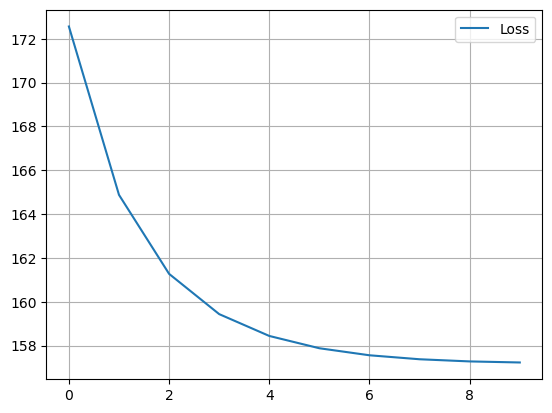

In [65]:
plt.plot(lr.losses, label = "Loss")
plt.grid()

plt.legend()
plt.show()

In [66]:
lr.do_task(X_train, y_train)

print("------------------------\n\n\n")

sk_lr = LinearRegression()


model = sk_lr.fit(X_train, y_train)

print(model.coef_)


print("\n\n\nPREDICITIONS\n--------------------------")
print(lr.predict(X_test))
print(model.predict(X_test))

Weights:  [ 2.3775149  14.10873096 -0.77819655]
Bias:  43.134814444358426
Residual Variance: 477.8663218318874
------------------------



[-4.70788676 14.00305878 -0.15294444]



PREDICITIONS
--------------------------
[50.13398224 51.48138407 54.48446286 ... 54.41983596 48.38992152
 52.46736991]
[50.90911738 52.73193112 55.66382618 ... 55.49862008 49.63987488
 53.40830263]


# TASK 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


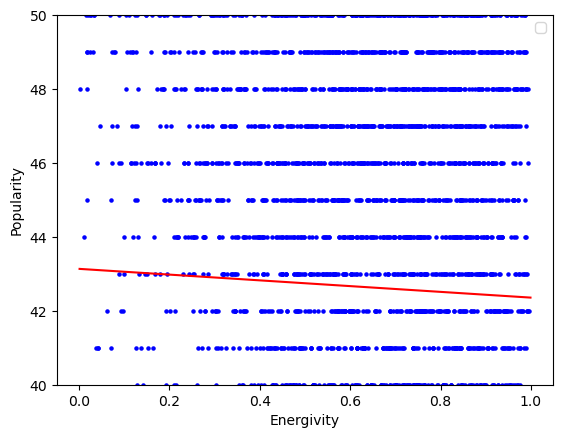

In [67]:
def plot_energyvity_popularity(LR, x, y):
    plt.scatter(x, y, color='b',s=5)
    x_line = np.linspace(x.min(), x.max(), 1000)
    y_line = lr.weights[2] * x_line + lr.b
    plt.plot(x_line, y_line, color='r')
    plt.xlabel('Energivity')
    plt.ylabel('Popularity')
    plt.legend()
    plt.ylim(40, 50)
    plt.show()
x = X_train[:,2].flatten()
plot_energyvity_popularity(lr, x, y_train)


Энергичность и популярность имеют обратную корреляцию(Причем очень мелкую).

# Task 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


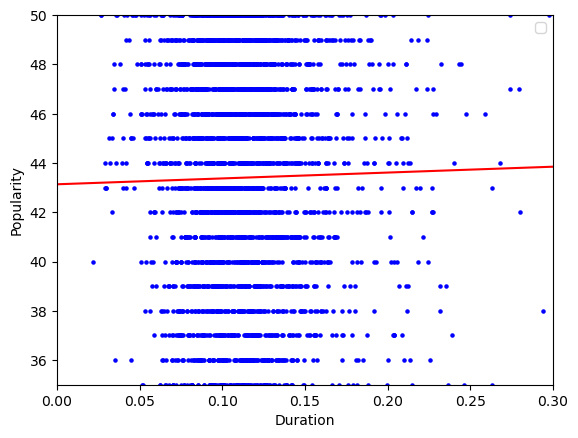

In [68]:
def plot_duration_popularity(LR, x, y):
    plt.scatter(x, y, color='b',s=5)
    x_line = np.linspace(x.min(), x.max(), 1000)
    y_line = lr.weights[0] * x_line + lr.b
    plt.plot(x_line, y_line, color='r')
    plt.xlabel('Duration')
    plt.ylabel('Popularity')
    plt.xlim(0, 0.3)
    plt.ylim(35, 50)
    plt.legend()
    plt.show()
x = X_train[:,0].flatten()
plot_duration_popularity(lr, x, y_train)

Продолжительность незначительно влияет на популярность.

# Task 3


In [70]:
x_restricted = np.column_stack((np.ones(X_train.shape[0]), X_train[:,0]))
x_full = np.column_stack((np.ones(X_train.shape[0]), X_train))

print("Shape of x_restricted:", x_restricted.shape)
print("Shape of x_full:", x_full.shape)

Shape of x_restricted: (14126, 2)
Shape of x_full: (14126, 4)


In [72]:
beta_full = np.linalg.inv(x_full.T @ x_full) @ x_full.T @ y_train

y_pred_full = x_full @ beta_full
residuals_full = y_train - y_pred_full

RSS_full = np.sum(residuals_full ** 2)



beta_restricted = np.linalg.inv(x_restricted.T @ x_restricted) @ x_restricted.T @ y_train

y_pred_restricted = x_restricted @ beta_restricted
residuals_restricted = y_train - y_pred_restricted

RSS_restricted = np.sum(residuals_restricted ** 2)


n = len(y_train)
p_full = x_full.shape[1]  # Число фичей в полной модели
p_restricted = x_restricted.shape[1]  # Число фичей в ограниченной модели


F = ((RSS_restricted - RSS_full) / (p_full - p_restricted)) / (RSS_full / (n - p_full))

from scipy.stats import f
p_value = 1 - f.cdf(F, p_full - p_restricted, n - p_full)

print("F-статистика:", F)
print("p-значение:", p_value)

if p_value < 0.05:
    print("Отклоняем нулевую гипотезу: коэффициенты при танцевальности и энергичности не равны нулю одновременно.")
else:
    print("Не удалось отклонить нулевую гипотезу: недостаточно доказательств, что коэффициенты при танцевальности и энергичности не равны нулю одновременно.")

F-статистика: 70.05380302463728
p-значение: 1.1102230246251565e-16
Отклоняем нулевую гипотезу: коэффициенты при танцевальности и энергичности не равны нулю одновременно.
